## Gradient Descent Assignment
In this assignment, you will implement and experiment with Gradient Descent on a simulated dataset. Your task is to complete the missing sections of the code, understand the role of each part of the algorithm, and tweak the hyperparameters to see their effect.

## Objectives:
Understand and implement the Gradient Descent algorithm.
Visualize how the cost function decreases with iterations.
Tweak learning rates and number of iterations to observe the impact.

## Instructions:
- Complete the code where indicated.
- Run each cell to observe the results.
- Use assert statements to validate your code.



### Part 1: Setting up the Dataset
In this section, we'll import necessary libraries and load the dataset.

In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Simulated real-world dataset with multiple features:
X = np.array([
    [750, 3, 30, 15],
    [850, 3, 25, 12],
    [900, 4, 20, 10],
    [1200, 4, 18, 8],
    [1500, 5, 10, 5],
    [2000, 5, 5, 3],
    [2300, 6, 3, 2],
    [3000, 6, 2, 1],
    [3500, 7, 1, 1],
    [4000, 8, 1, 0]
])  # Features: [Size, Bedrooms, Age, Distance to City Center]

y = np.array([150, 175, 200, 300, 375, 480, 525, 650, 720, 800])  # Price of the house in 1000s of dollars

In this section, we’ll import necessary libraries and load the dataset.

$$ X_{norm} = \frac{X - \mu}{\sigma} $$
 
where mu is the mean and sigma is the standard deviation of the features.

In [2]:
# Normalize features for better convergence
X_norm = (X - X.mean(axis=0)) / X.std(axis=0)
# Add a column of ones to X_norm to account for theta0 (intercept)
X_b = np.c_[np.ones(X_norm.shape[0]), X_norm]  # Add intercept term

### Part 2: Gradient Descent Algorithm
Now, we will implement the Gradient Descent algorithm.

### Useful Equations

$$ Y_{prediction} = f(X) = W.X $$

$$ J (Cost Function) = \frac{1}{2m}  (Y_{prediction}  - Y)^2 $$

$$ \begin{align}
Gradient &(\frac{\partial J(W)}{\partial W}) = \frac{1}{m}  (Y_{prediction} - Y).X\\
\end{align} $$

$$ \begin{align*} 
  W &= W -  \alpha .(\frac{\partial J(W)}{\partial W}) 
  \end{align*} $$

Complete the missing parts of the code below:

In [9]:
# Initialize parameters (weights vector) with zeros
theta = np.zeros(X_b.shape[1])

# Define learning rate and number of iterations
alpha = 0.01  # You can experiment with this
iterations = 1000  # Try changing this value

# Gradient descent function
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)  # Number of training examples
    cost_history = []  # To store the cost at each iteration

    for i in range(iterations):
        # Predicted values 
        y_pred = X.dot(theta)

        # Compute the error (difference between predicted and actual values)
        error = y_pred - y

        # Compute gradients 
        gradients =  (1/m) * (error.dot(X))

        # Update the parameters (theta)
        theta = theta - alpha * gradients

        # Compute the cost function (Mean Squared Error) and append to history
        cost = (1/(2*m))*np.sum(np.square(error))
        cost_history.append(cost)

    return theta, cost_history

In [10]:

# Running the gradient descent function
theta, cost_history = gradient_descent(X_b, y, theta, alpha, iterations)


# Assert statement to check theta shape
assert theta.shape == (X_b.shape[1],), "Theta shape mismatch!"


### Part 3: Visualizing the Cost Function
Let's plot the cost function to observe how it decreases over time.

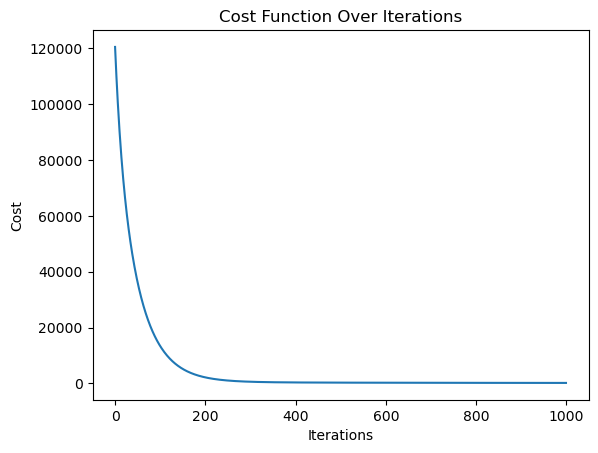

In [11]:
plt.plot(range(iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Over Iterations')
plt.show()

# Assert to check the final cost decreases
assert cost_history[-1] < cost_history[0], "Cost did not decrease!"


### Part 4: Predictions and Visualization
Now, we'll use the final parameters to make predictions

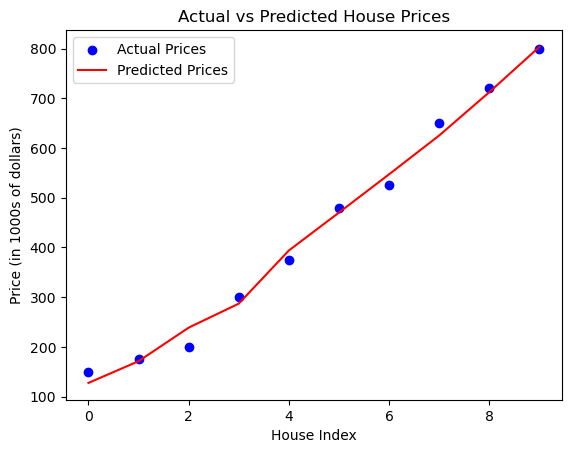

In [12]:
# Predicted prices using the final parameters
y_pred_final = X_b.dot(theta)

# Plotting actual vs predicted prices
plt.scatter(range(len(y)), y, color='blue', label='Actual Prices')
plt.plot(range(len(y)), y_pred_final, color='red', label='Predicted Prices')
plt.xlabel('House Index')
plt.ylabel('Price (in 1000s of dollars)')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.show()

# Assert to check predictions length
assert len(y_pred_final) == len(y), "Prediction length mismatch!"

### Part 6: Implementing Gradient Descent on Real-World Data (Ames Housing Dataset)
In this section, you will apply the Gradient Descent algorithm to a real dataset from the Ames Housing dataset. Download the dataset from Kaggle and follow the steps below.

## Instructions:
Load the dataset and manually preprocess the data without using any third-party libraries like sklearn.
Implement the Gradient Descent algorithm as you did for the simulated data.
Visualize the cost function and make predictions.
Experiment with hyperparameters and observe their effects.

## Loading and Preprocessing the Dataset (Manual Processing)

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('AmesHousing.csv')


## Feature Selection
features = ['Lot Area', 'Overall Qual', 'Year Built', 'Total Bsmt SF', 'Gr Liv Area'] 
target = 'SalePrice'

# Extracting features and target
X_real = df[features].values
y_real = df[target].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_real, y_real, test_size=0.2, random_state=42)

# Normalize features for better convergence
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Add a column of ones for the intercept term
X_train_b = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_b = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

## Implementing Gradient Descent for Real-World Data

In [18]:
# Initialize parameters (weights vector) with zeros
theta_real = np.zeros(X_train_b.shape[1])

# Define learning rate and number of iterations (You can experiment with these values)
alpha_real = 0.01
iterations_real = 1000

## Incase of having NaN values in the dataset, replace them with 0
X_train_b = np.nan_to_num(X_train_b)  # Replace NaNs with 0

# Use the gradient_descent function you implemented earlier
theta_real, cost_history_real = gradient_descent(X_train_b, y_train, theta_real, alpha_real, iterations_real)
# Assert statement to check theta shape
assert theta_real.shape == (X_train_b.shape[1],), "Theta shape mismatch for real dataset!"


## Visualizing the Cost Function for Real Data

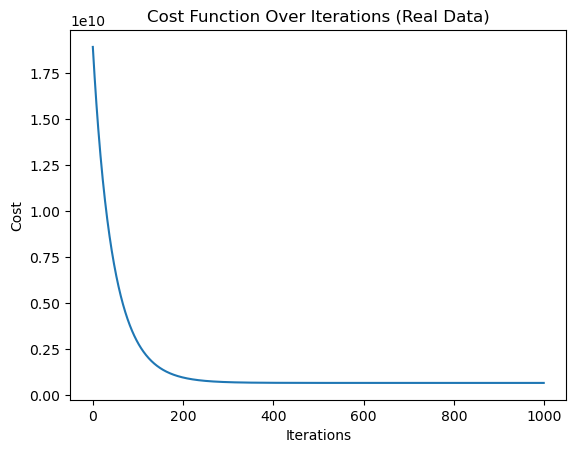

In [19]:
# Plotting the cost function over iterations for real data
plt.plot(range(iterations_real), cost_history_real)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Over Iterations (Real Data)')
plt.show()

# Assert to check cost reduction
assert cost_history_real[-1] < cost_history_real[0], "Cost did not decrease for real data!"


## Making Predictions on Real Data
Once the model has been trained, we can now make predictions on the test set.

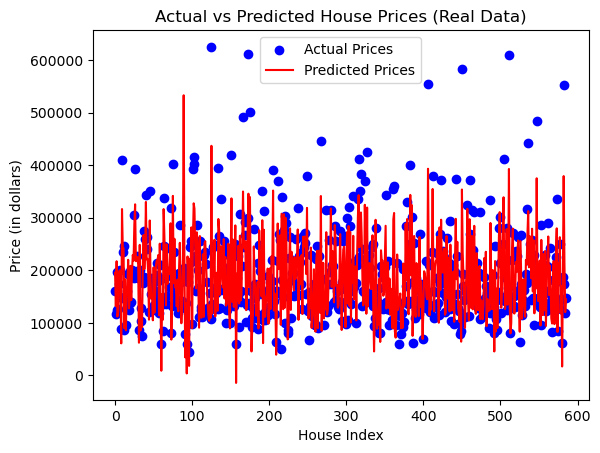

In [20]:
# Normalize the test data
X_test_scaled = scaler.transform(X_test)

# Add intercept term for the test data
X_test_b =  np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

# Predicted prices using the final parameters for real data
y_pred_real = X_test_b.dot(theta_real)


# Plotting actual vs predicted prices
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Prices')
plt.plot(range(len(y_test)), y_pred_real, color='red', label='Predicted Prices')
plt.xlabel('House Index')
plt.ylabel('Price (in dollars)')
plt.title('Actual vs Predicted House Prices (Real Data)')
plt.legend()
plt.show()

# Assert to check predictions length
assert len(y_pred_real) == len(y_test), "Prediction length mismatch for real data!"


## Part 7: Experimenting with Hyperparameters for Real Data
You can now experiment with different learning rates and iterations to observe their effects on the model.

### Tasks:

Run the Gradient Descent with alpha=0.001, alpha=0.1, and alpha=0.05. Record the final cost and observe the impact of the learning rate.
Try using different sets of features from the dataset. For example, you can add more features or remove certain features and see how the model's performance changes.

In [30]:
# Calculate the correlation matrix while explicitly setting numeric_only to True
correlation_matrix = df.corr(numeric_only=True)

# Print the sorted correlation values for SalePrice
print(correlation_matrix["SalePrice"].sort_values(ascending=False))



SalePrice          1.000000
Overall Qual       0.799262
Gr Liv Area        0.706780
Garage Cars        0.647877
Garage Area        0.640401
Total Bsmt SF      0.632280
1st Flr SF         0.621676
Year Built         0.558426
Full Bath          0.545604
Year Remod/Add     0.532974
Garage Yr Blt      0.526965
Mas Vnr Area       0.508285
TotRms AbvGrd      0.495474
Fireplaces         0.474558
BsmtFin SF 1       0.432914
Lot Frontage       0.357318
Wood Deck SF       0.327143
Open Porch SF      0.312951
Half Bath          0.285056
Bsmt Full Bath     0.276050
2nd Flr SF         0.269373
Lot Area           0.266549
Bsmt Unf SF        0.182855
Bedroom AbvGr      0.143913
Screen Porch       0.112151
Pool Area          0.068403
Mo Sold            0.035259
3Ssn Porch         0.032225
BsmtFin SF 2       0.005891
Misc Val          -0.015691
Yr Sold           -0.030569
Order             -0.031408
Bsmt Half Bath    -0.035835
Low Qual Fin SF   -0.037660
MS SubClass       -0.085092
Overall Cond      -0

### Final Note on Gradient Descent
Gradient Descent is an optimization algorithm used to minimize the cost function in machine learning by iteratively adjusting model parameters. The algorithm calculates the gradient (slope) of the cost function and updates the parameters in the direction that reduces the error.

- Learning Rate (α) controls the size of steps taken towards the minimum.
- Iterations determine how many times the parameters are updated.
- Convergence is reached when changes in the cost become negligible.

Gradient Descent has variants like Batch, Stochastic, and Mini-Batch, each balancing between computation time and convergence stability. It is widely used in linear regression, neural networks, and more, making it essential for optimizing machine learning models.

Running Gradient Descent with alpha=0.001
Running Gradient Descent with alpha=0.1
Running Gradient Descent with alpha=0.05


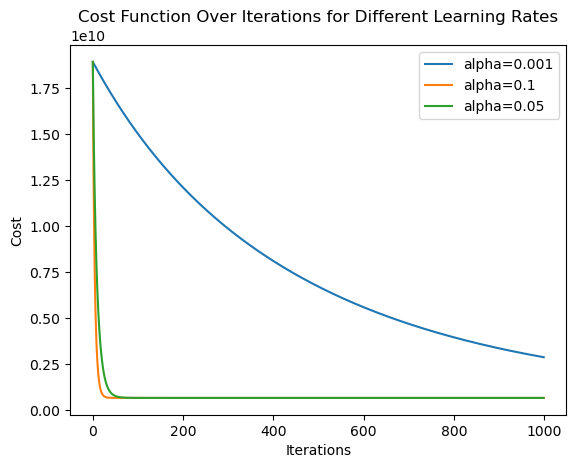

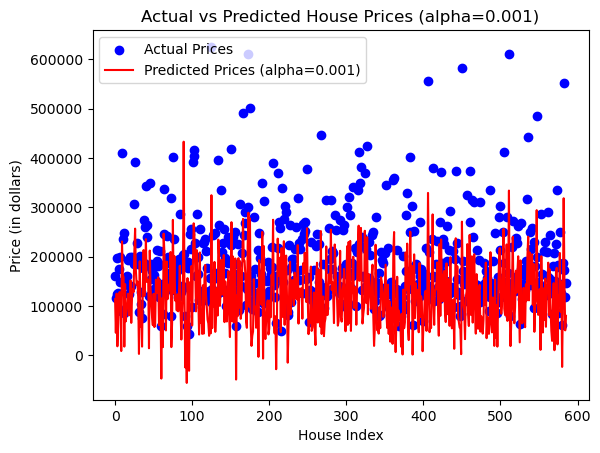

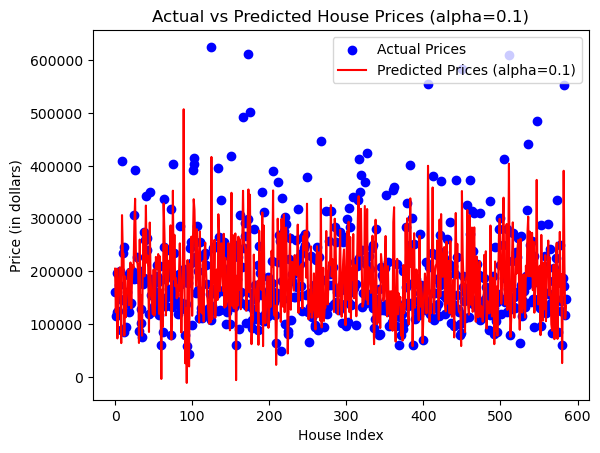

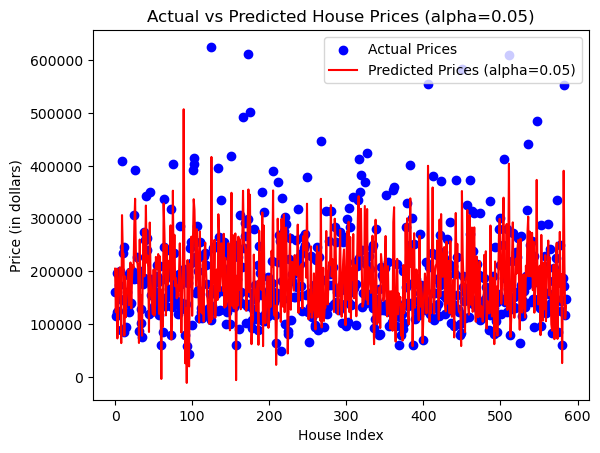

Final cost for alpha=0.001: 2884076985.2241592
Final cost for alpha=0.1: 673774453.4538736
Final cost for alpha=0.05: 673774453.4904577


In [24]:
# Select a few features based on correlation analysis
features1 = ['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Total Bsmt SF', '1st Flr SF']
target = 'SalePrice'

# Extracting features and target
X_real = df[features1].values
y_real = df[target].values
# Handle NaN values by replacing them with 0
X_real = np.nan_to_num(X_real)
y_real = np.nan_to_num(y_real)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_real, y_real, test_size=0.2, random_state=42)

# Normalize features for better convergence
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Add a column of ones for the intercept term
X_train_b = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_scaled = scaler.transform(X_test)
X_test_b = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]
"""Step 2: Gradient Descent Implementation
This function will be reused from our previous work but is generalized for flexibility in hyperparameters."""
"""
Step 3: Running Gradient Descent with Different Learning Rates
We will experiment with three different learning rates: alpha = 0.001, alpha = 0.1, and alpha = 0.05."""

# Initialize parameters (weights vector) with zeros
theta_initial = np.zeros(X_train_b.shape[1])

# Define number of iterations
iterations = 1000

# Learning rates to experiment with
alphas = [0.001, 0.1, 0.05]

# Dictionary to store the results for each alpha
results = {}

for alpha in alphas:
    print(f"Running Gradient Descent with alpha={alpha}")
    
    # Run gradient descent
    theta, cost_history = gradient_descent(X_train_b, y_train, theta_initial, alpha, iterations)
    
    # Store the final cost and theta values
    results[alpha] = {'theta': theta, 'cost_history': cost_history}
    
    # Plot the cost function for the given alpha
    plt.plot(range(iterations), cost_history, label=f'alpha={alpha}')

# Plot settings
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Over Iterations for Different Learning Rates')
plt.legend()
plt.show()
"""Step 4: Evaluate the Model
Now, we’ll evaluate the performance of the trained model using the test data for each learning rate.
"""
for alpha in alphas:
    # Get the theta for the current alpha
    theta = results[alpha]['theta']
    
    # Predicted prices using the final parameters for real data
    y_pred_real = X_test_b.dot(theta)
    
    # Plotting actual vs predicted prices
    plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Prices')
    plt.plot(range(len(y_test)), y_pred_real, color='red', label=f'Predicted Prices (alpha={alpha})')
    plt.xlabel('House Index')
    plt.ylabel('Price (in dollars)')
    plt.title(f'Actual vs Predicted House Prices (alpha={alpha})')
    plt.legend()
    plt.show()
"""Step 5: Record Final Cost
To record and compare the final cost for each learning rate:"""


for alpha in alphas:
    final_cost = results[alpha]['cost_history'][-1]
    print(f"Final cost for alpha={alpha}: {final_cost}")

In [25]:
# List of different feature sets
feature_sets = [
    ['Lot Area', 'Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF'],   # Set 1
    ['Year Built', 'Year Remod/Add', '1st Flr SF', 'Garage Yr Blt', 'Mas Vnr Area'],  # Set 2
    ['TotRms AbvGrd', 'Fireplaces', 'Wood Deck SF', 'Open Porch SF', 'Full Bath']   # Set 3
]

# Looping through each feature set and running gradient descent
for features in feature_sets:
    print(f"Running Gradient Descent with features: {features}")
    X_real = df[features].values
    y_real = df['SalePrice'].values
    # Handling NaN values by replacing them with 0
    X_real = np.nan_to_num(X_real)
    y_real = np.nan_to_num(y_real)
    # Splitting the data, normalizing.
    X_train, X_test, y_train, y_test = train_test_split(X_real, y_real, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_train_b = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
    X_test_b = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

    # Running Gradient Descent
    for alpha in [0.001, 0.1, 0.05]:
        print(f"  Alpha = {alpha}")
        theta_real = np.zeros(X_train_b.shape[1])  # Resetting theta for each run
        theta_real, cost_history_real = gradient_descent(X_train_b, y_train, theta_real, alpha, iterations)
        print(f"    Final cost for alpha {alpha}: {cost_history_real[-1]}")


Running Gradient Descent with features: ['Lot Area', 'Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF']
  Alpha = 0.001
    Final cost for alpha 0.001: 2872388527.197498
  Alpha = 0.1
    Final cost for alpha 0.1: 666843613.3228043
  Alpha = 0.05
    Final cost for alpha 0.05: 666843613.3228043
Running Gradient Descent with features: ['Year Built', 'Year Remod/Add', '1st Flr SF', 'Garage Yr Blt', 'Mas Vnr Area']
  Alpha = 0.001
    Final cost for alpha 0.001: 3375167666.9869165
  Alpha = 0.1
    Final cost for alpha 0.1: 1165726583.6026027
  Alpha = 0.05
    Final cost for alpha 0.05: 1165726583.6026025
Running Gradient Descent with features: ['TotRms AbvGrd', 'Fireplaces', 'Wood Deck SF', 'Open Porch SF', 'Full Bath']
  Alpha = 0.001
    Final cost for alpha 0.001: 3716068850.701531
  Alpha = 0.1
    Final cost for alpha 0.1: 1514502247.1511598
  Alpha = 0.05
    Final cost for alpha 0.05: 1514502247.1511598


Running Gradient Descent with features: ['Lot Area', 'Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF']
  Alpha = 0.001


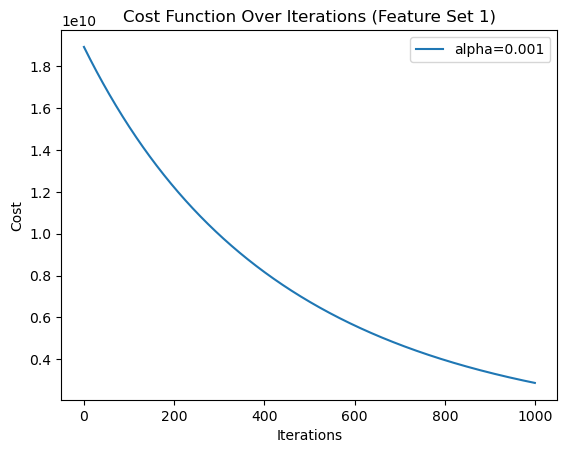

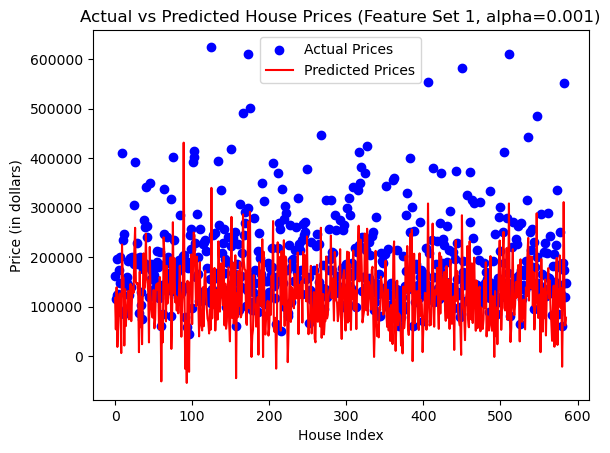

  Alpha = 0.1


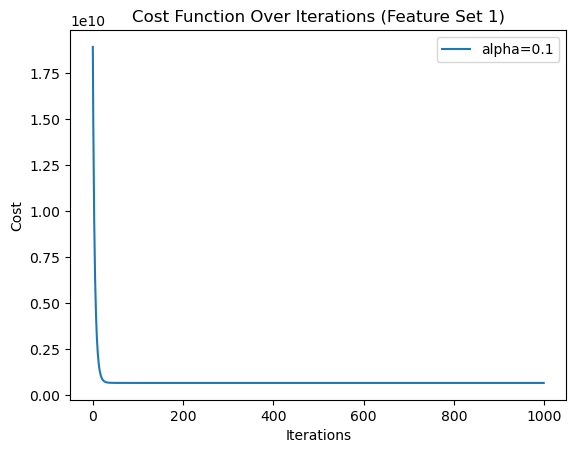

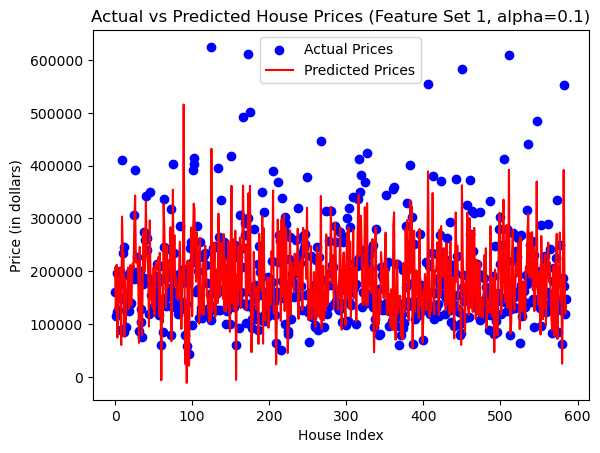

  Alpha = 0.05


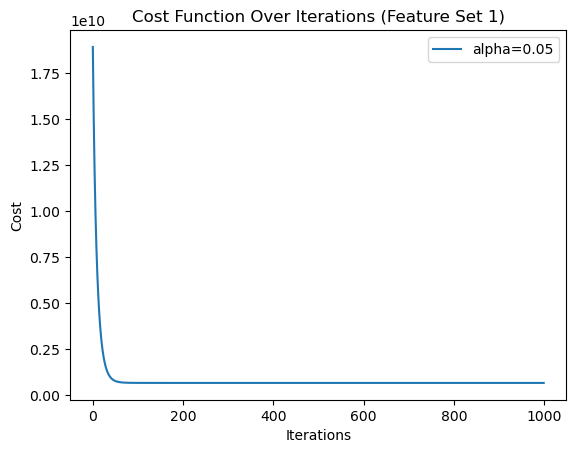

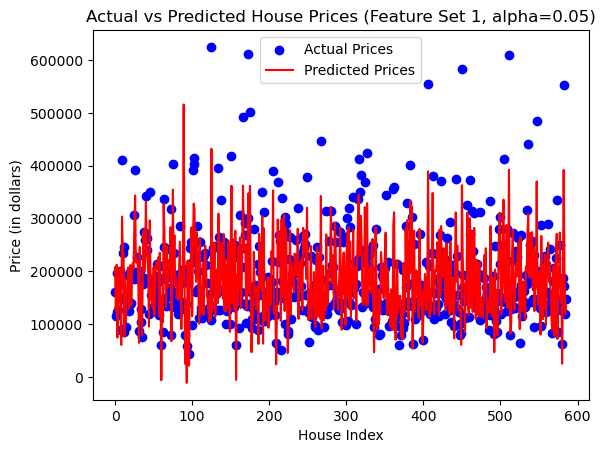

Running Gradient Descent with features: ['Year Built', 'Year Remod/Add', '1st Flr SF', 'Garage Yr Blt', 'Mas Vnr Area']
  Alpha = 0.001


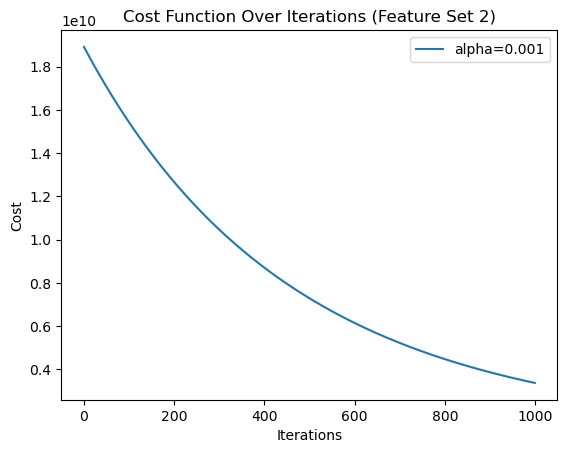

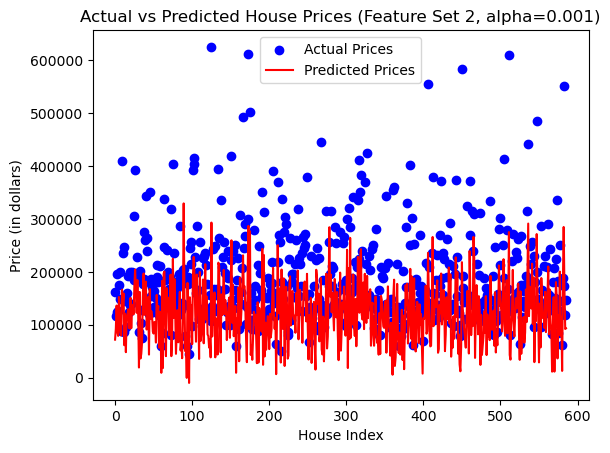

  Alpha = 0.1


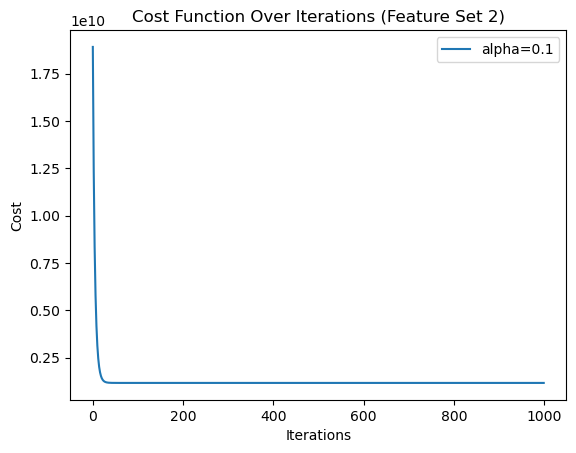

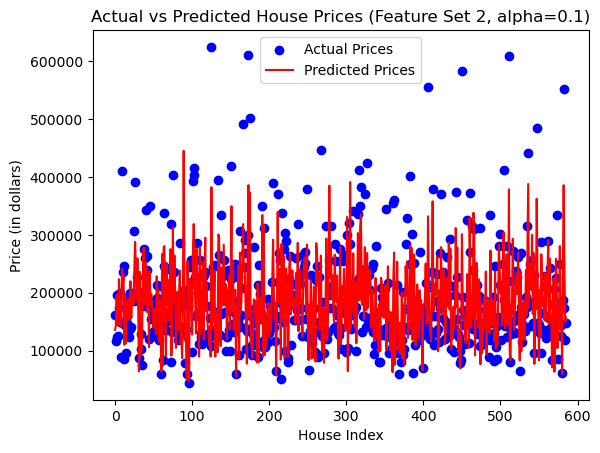

  Alpha = 0.05


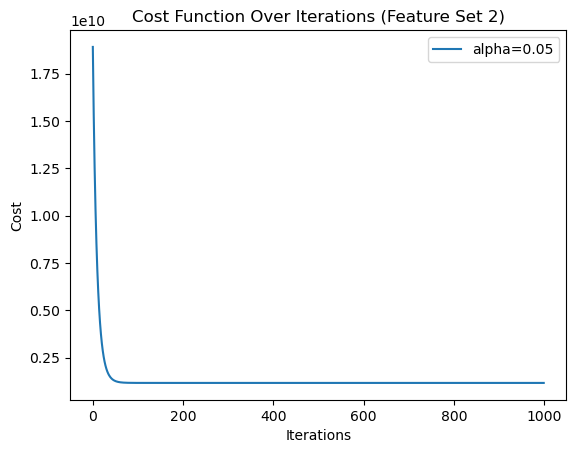

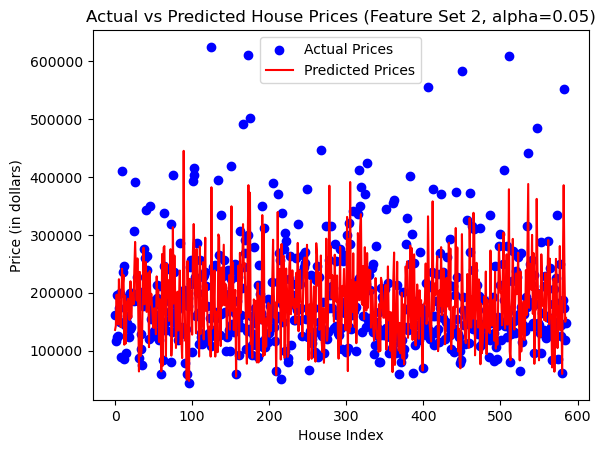

Running Gradient Descent with features: ['TotRms AbvGrd', 'Fireplaces', 'Wood Deck SF', 'Open Porch SF', 'Full Bath']
  Alpha = 0.001


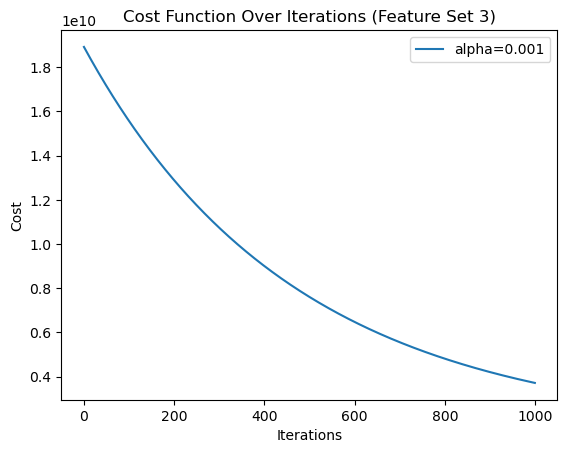

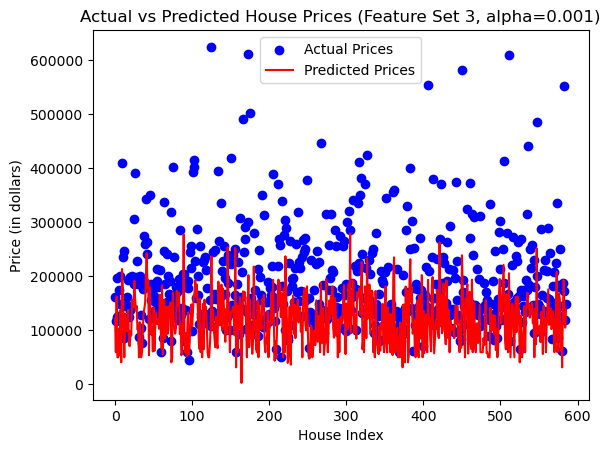

  Alpha = 0.1


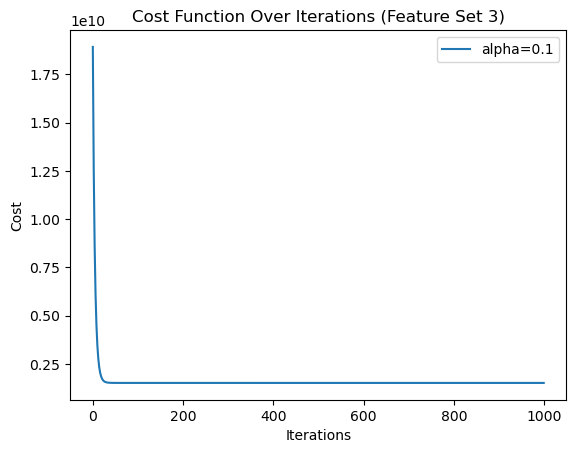

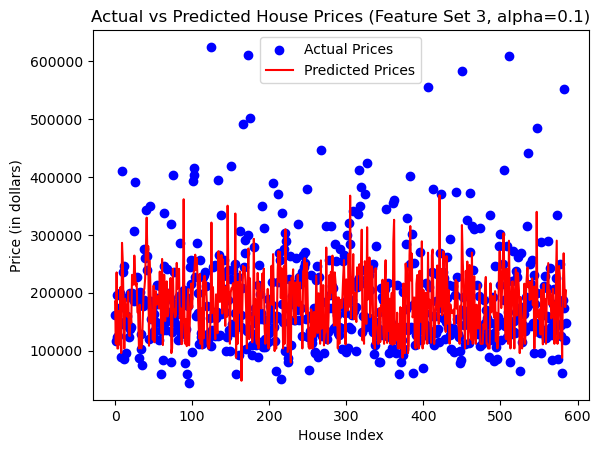

  Alpha = 0.05


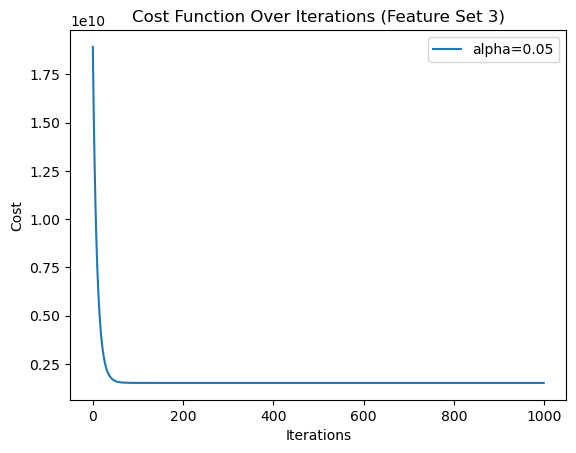

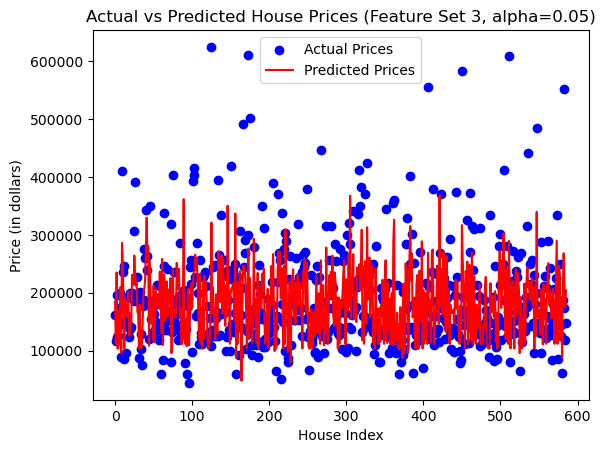

In [27]:
import matplotlib.pyplot as plt

# Visualization for Gradient Descent
def plot_cost_function(cost_history_real, alpha, feature_set_index):
    """Plots the cost function over iterations."""
    plt.plot(range(len(cost_history_real)), cost_history_real, label=f'alpha={alpha}')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title(f'Cost Function Over Iterations (Feature Set {feature_set_index})')
    plt.legend()
    plt.show()

def plot_actual_vs_predicted(y_test, y_pred_real, feature_set_index, alpha):
    """Plots actual vs predicted prices."""
    plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Prices')
    plt.plot(range(len(y_test)), y_pred_real, color='red', label='Predicted Prices')
    plt.xlabel('House Index')
    plt.ylabel('Price (in dollars)')
    plt.title(f'Actual vs Predicted House Prices (Feature Set {feature_set_index}, alpha={alpha})')
    plt.legend()
    plt.show()

# Loops through each feature set and visualizes
feature_sets = [
    ['Lot Area', 'Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF'],   # Set 1
    ['Year Built', 'Year Remod/Add', '1st Flr SF', 'Garage Yr Blt', 'Mas Vnr Area'],  # Set 2
    ['TotRms AbvGrd', 'Fireplaces', 'Wood Deck SF', 'Open Porch SF', 'Full Bath']   # Set 3
]

iterations = 1000  # Number of iterations

# Loop through each feature set and run gradient descent + visualization
for idx, features in enumerate(feature_sets):
    print(f"Running Gradient Descent with features: {features}")
    X_real = df[features].values
    y_real = df['SalePrice'].values
    # Handle NaN values by replacing them with 0
    X_real = np.nan_to_num(X_real)
    y_real = np.nan_to_num(y_real)
    # Split the data, normalize, etc. (as done earlier)
    X_train, X_test, y_train, y_test = train_test_split(X_real, y_real, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_train_b = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
    X_test_b = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

    # Run Gradient Descent and visualize for each learning rate
    for alpha in [0.001, 0.1, 0.05]:
        print(f"  Alpha = {alpha}")
        theta_real = np.zeros(X_train_b.shape[1])  # Reset theta for each run
        theta_real, cost_history_real = gradient_descent(X_train_b, y_train, theta_real, alpha, iterations)
        
        # Plot cost function
        plot_cost_function(cost_history_real, alpha, idx+1)
        
        # Predict the test set using the trained model
        y_pred_real = X_test_b.dot(theta_real)
        
        # Plot actual vs predicted prices
        plot_actual_vs_predicted(y_test, y_pred_real, idx+1, alpha)


### Observations:

After experimenting with Gradient Descent on three different feature sets using learning rates of **0.001**, **0.1**, and **0.05**, a few clear trends have emerged:

---

#### **Effect of Learning Rate:**

- A lower learning rate (**alpha = 0.001**) consistently resulted in **higher final costs** across all feature sets. This indicates that the model is learning slowly and isn’t able to optimize effectively within the set number of iterations.
- On the other hand, learning rates of **0.1** and **0.05** performed significantly better, yielding **much lower final costs**. This suggests these rates allow for **quicker and more efficient convergence**, resulting in more accurate predictions.

---

#### **Impact of Feature Selection:**

1. **First Feature Set**:  
   *Features*:  
   `['Lot Area', 'Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF']`
   - **Best performance**, with a final cost of around **666 million** (for both learning rates of 0.1 and 0.05).
   - These features have **strong correlations** with house prices, enabling more accurate predictions.

2. **Second Feature Set**:  
   *Features*:  
   `['Year Built', 'Year Remod/Add', '1st Flr SF', 'Garage Yr Blt', 'Mas Vnr Area']`
   - Final cost was **1.17 billion**, indicating these features are **less predictive** of house prices compared to the first set.

3. **Third Feature Set**:  
   *Features*:  
   `['TotRms AbvGrd', 'Fireplaces', 'Wood Deck SF', 'Open Porch SF', 'Full Bath']`
   - **Worst performance**, with a final cost of about **1.51 billion**. This suggests these features are **less influential** on house prices, making the model less effective with this selection.

---

#### **Convergence Stability:**

- Both **alpha = 0.1** and **alpha = 0.05** produced stable results, with **quick convergence** and **low final costs**. 
- However, the lower alpha (**0.001**) resulted in **much slower convergence**, leading to **higher final costs**.

---

### **Summary:**

- **Feature selection** significantly impacts model performance. 
- Using a **higher learning rate** (0.1 or 0.05) results in faster learning and more accurate predictions. 
- The first feature set yielded the **best performance** due to its strong correlation with the target variable (house prices).


Running Gradient Descent with 100 iterations
Running Gradient Descent with 500 iterations
Running Gradient Descent with 1000 iterations
Running Gradient Descent with 2000 iterations


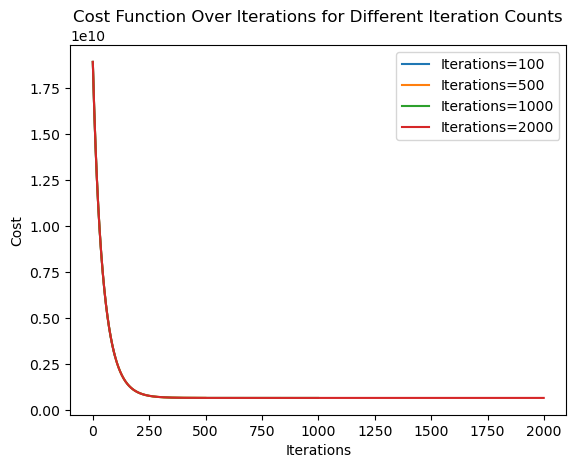

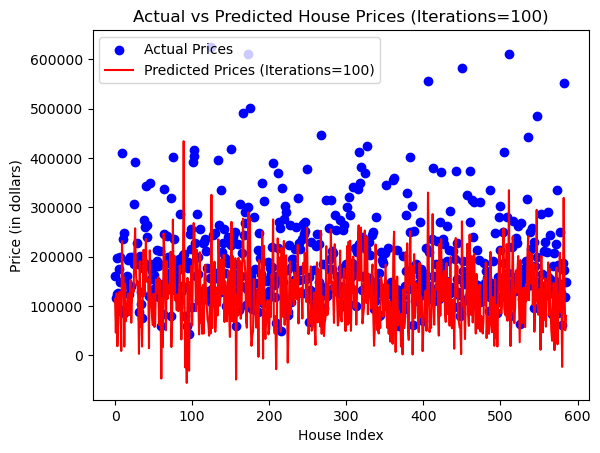

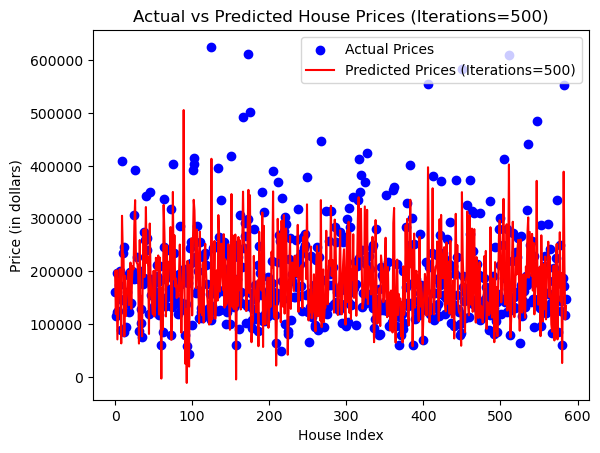

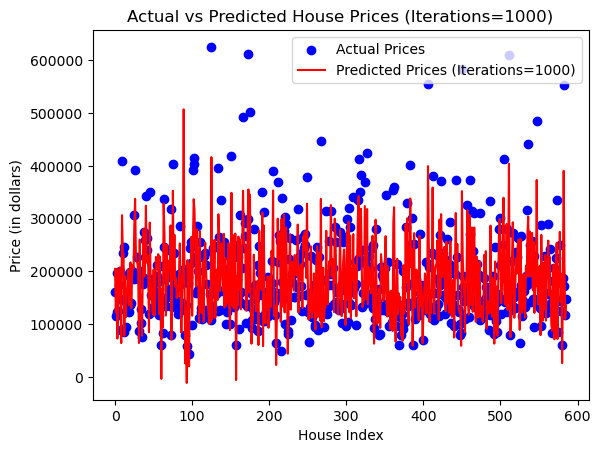

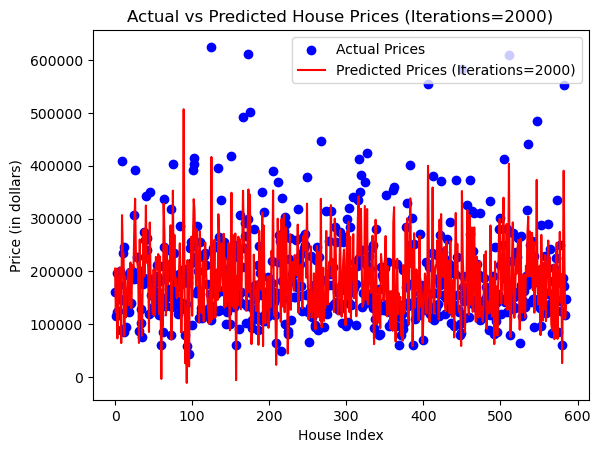

Final cost for 100 iterations: 2903878027.6152277
Final cost for 500 iterations: 675477055.0979923
Final cost for 1000 iterations: 673802567.7765634
Final cost for 2000 iterations: 673774970.1487516


In [28]:
# Select features based on correlation analysis
features1 = ['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Total Bsmt SF', '1st Flr SF']
target = 'SalePrice'

# Extracting features and target
X_real = df[features1].values
y_real = df[target].values

# Handle NaN values by replacing them with 0
X_real = np.nan_to_num(X_real)
y_real = np.nan_to_num(y_real)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_real, y_real, test_size=0.2, random_state=42)

# Normalize features for better convergence
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Add a column of ones for the intercept term
X_train_b = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_scaled = scaler.transform(X_test)
X_test_b = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

# Step 2: Gradient Descent Implementation
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        theta -= (alpha / m) * (X.T.dot(errors))
        cost_history[i] = (1 / (2 * m)) * np.sum(errors ** 2)

    return theta, cost_history

# Step 3: Experimenting with Different Iteration Counts
# Different numbers of iterations to experiment with
iteration_counts = [100, 500, 1000, 2000]

# Dictionary to store the results for each iteration count
results = {}

for iterations in iteration_counts:
    print(f"Running Gradient Descent with {iterations} iterations")
    
    # Initialize parameters (weights vector) with zeros
    theta_initial = np.zeros(X_train_b.shape[1])
    
    # Run gradient descent
    theta, cost_history = gradient_descent(X_train_b, y_train, theta_initial, alpha=0.01, iterations=iterations)
    
    # Store the final cost and theta values
    results[iterations] = {'theta': theta, 'cost_history': cost_history}
    
    # Plot the cost function for the given iteration count
    plt.plot(range(iterations), cost_history, label=f'Iterations={iterations}')

# Plot settings
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Over Iterations for Different Iteration Counts')
plt.legend()
plt.show()

# Step 4: Evaluate the Model
for iterations in iteration_counts:
    # Get the theta for the current iteration count
    theta = results[iterations]['theta']
    
    # Predicted prices using the final parameters for real data
    y_pred_real = X_test_b.dot(theta)
    
    # Plotting actual vs predicted prices
    plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Prices')
    plt.plot(range(len(y_test)), y_pred_real, color='red', label=f'Predicted Prices (Iterations={iterations})')
    plt.xlabel('House Index')
    plt.ylabel('Price (in dollars)')
    plt.title(f'Actual vs Predicted House Prices (Iterations={iterations})')
    plt.legend()
    plt.show()

# Step 5: Record Final Cost
for iterations in iteration_counts:
    final_cost = results[iterations]['cost_history'][-1]
    print(f"Final cost for {iterations} iterations: {final_cost}")

# Observations on Gradient Descent with Varying Iteration Counts

After experimenting with different iteration counts for the Gradient Descent algorithm, the following insights were gathered:

### Final Costs by Iteration Count:
- **100 Iterations**: The final cost was approximately **2,903,878,027.62**. This high cost suggests that the model did not converge well within just 100 iterations, indicating insufficient iterations to adequately minimize the error.
  
- **500 Iterations**: The final cost improved significantly to around **675,477,055.10**. This reduction in cost shows that increasing the number of iterations allows the model to converge more effectively, but it is still not optimal.

- **1000 Iterations**: With 1000 iterations, the final cost decreased further to approximately **673,802,567.78**. This indicates that the model is converging well, achieving a more stable and lower cost.

- **2000 Iterations**: The final cost for 2000 iterations was about **673,774,970.15**, which is very close to the cost achieved with 1000 iterations. This suggests that after a certain point, increasing the number of iterations yields diminishing returns regarding cost reduction.

### Summary of Findings:
- **Impact of Iteration Count**: The number of iterations plays a crucial role in the convergence of the Gradient Descent algorithm. Fewer iterations can lead to a suboptimal model, while sufficient iterations allow the algorithm to converge towards a lower cost.

- **Diminishing Returns**: Beyond a certain point (in this case, around 1000 iterations), additional iterations result in marginal improvements in cost. This indicates that while it is essential to allow enough iterations for convergence, excessively high iteration counts may not be necessary for significant performance gains.

In conclusion, the experiment demonstrates the importance of selecting an appropriate number of iterations in the Gradient Descent algorithm to balance convergence speed and cost efficiency effectively.



### Rough:

Running Gradient Descent with features: ['Lot Area', 'Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF']
  Alpha = 0.001
  Alpha = 0.1
  Alpha = 0.05
Running Gradient Descent with features: ['Year Built', 'Year Remod/Add', '1st Flr SF', 'Garage Yr Blt', 'Mas Vnr Area']
  Alpha = 0.001
  Alpha = 0.1
  Alpha = 0.05
Running Gradient Descent with features: ['TotRms AbvGrd', 'Fireplaces', 'Wood Deck SF', 'Open Porch SF', 'Full Bath']
  Alpha = 0.001
  Alpha = 0.1
  Alpha = 0.05


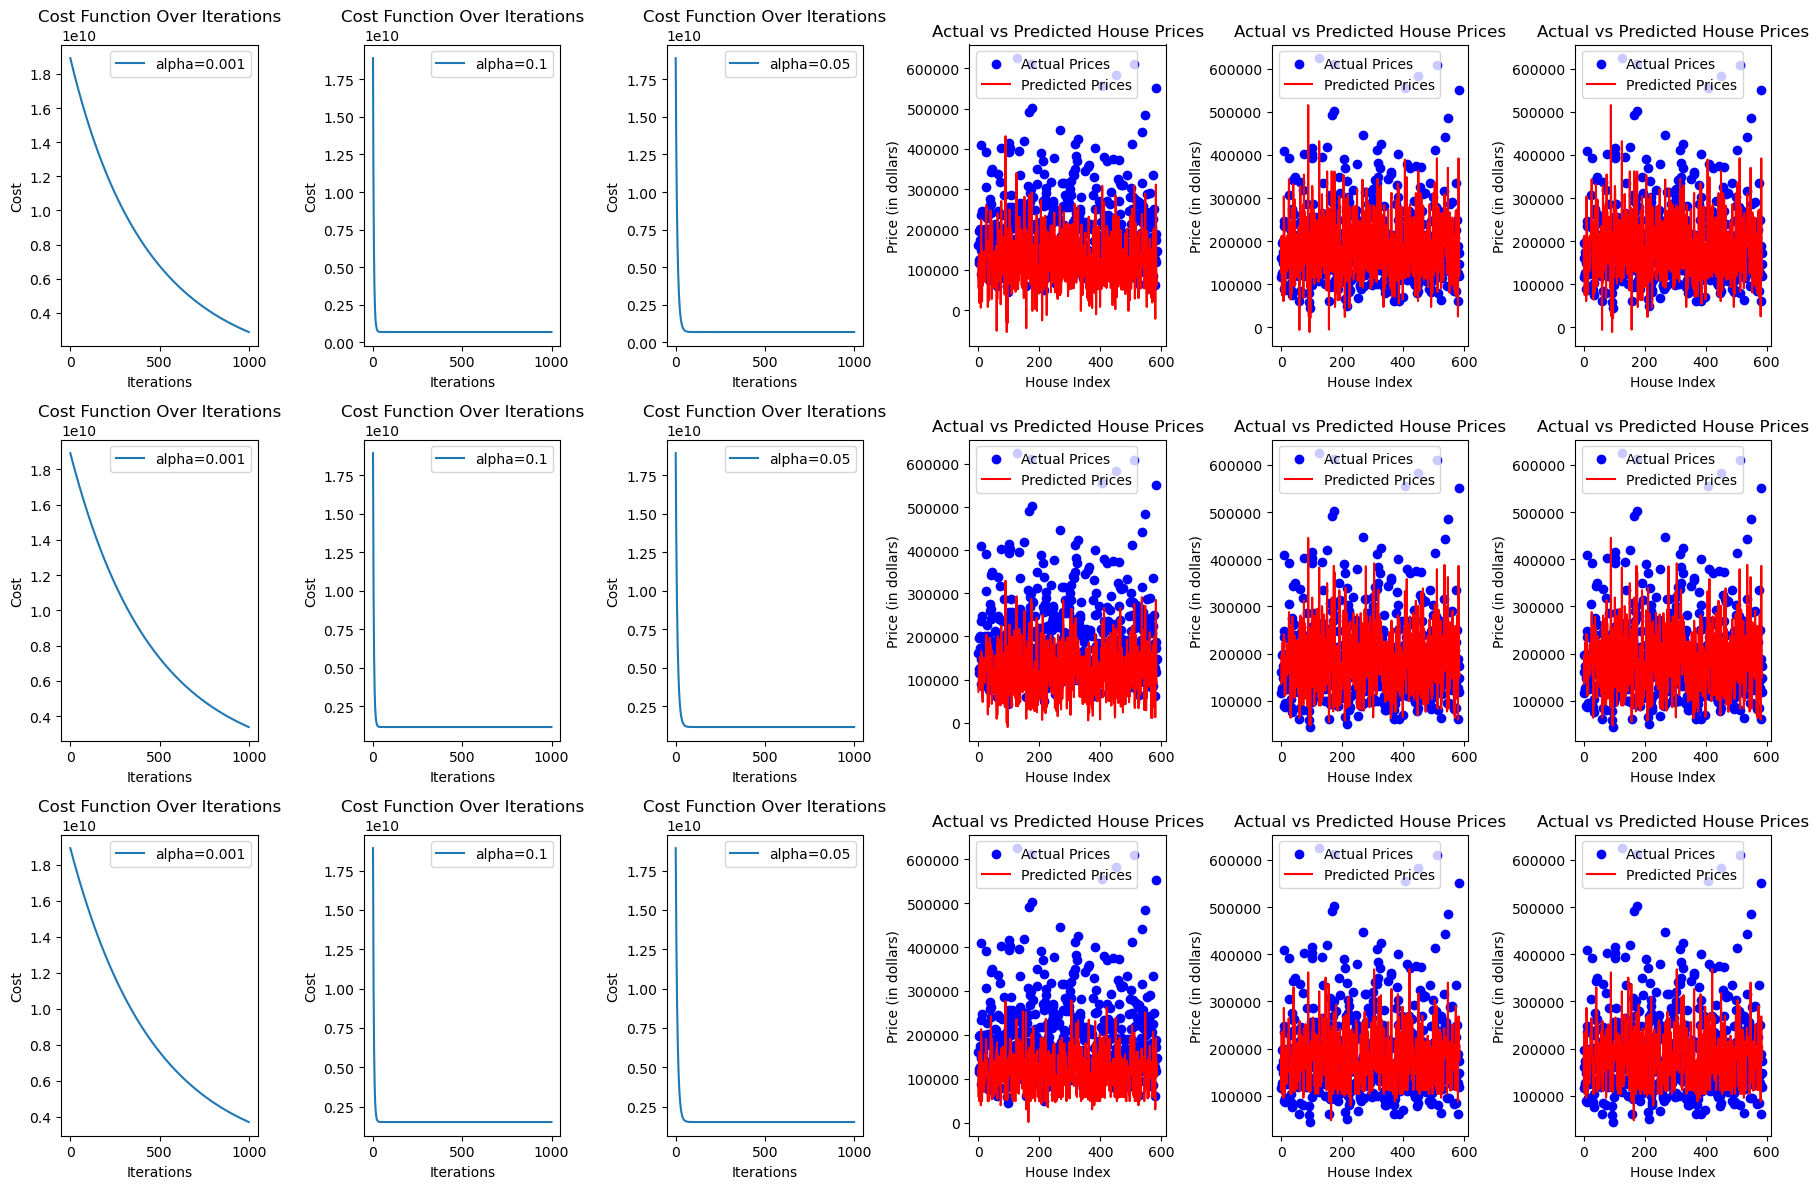

In [29]:
import matplotlib.pyplot as plt

# Visualization for Gradient Descent
def plot_cost_function(ax, cost_history_real, alpha):
    """Plots the cost function over iterations."""
    ax.plot(range(len(cost_history_real)), cost_history_real, label=f'alpha={alpha}')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title('Cost Function Over Iterations')
    ax.legend()

def plot_actual_vs_predicted(ax, y_test, y_pred_real):
    """Plots actual vs predicted prices."""
    ax.scatter(range(len(y_test)), y_test, color='blue', label='Actual Prices')
    ax.plot(range(len(y_test)), y_pred_real, color='red', label='Predicted Prices')
    ax.set_xlabel('House Index')
    ax.set_ylabel('Price (in dollars)')
    ax.set_title('Actual vs Predicted House Prices')
    ax.legend()

# Loops through each feature set and visualizes
feature_sets = [
    ['Lot Area', 'Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF'],   # Set 1
    ['Year Built', 'Year Remod/Add', '1st Flr SF', 'Garage Yr Blt', 'Mas Vnr Area'],  # Set 2
    ['TotRms AbvGrd', 'Fireplaces', 'Wood Deck SF', 'Open Porch SF', 'Full Bath']   # Set 3
]

iterations = 1000  # Number of iterations

# Create a figure with a grid of subplots
fig, axs = plt.subplots(nrows=len(feature_sets), ncols=6, figsize=(18, 12))

# Loop through each feature set and run gradient descent + visualization
for idx, features in enumerate(feature_sets):
    print(f"Running Gradient Descent with features: {features}")
    X_real = df[features].values
    y_real = df['SalePrice'].values
    # Handle NaN values by replacing them with 0
    X_real = np.nan_to_num(X_real)
    y_real = np.nan_to_num(y_real)
    
    # Split the data, normalize, etc. (as done earlier)
    X_train, X_test, y_train, y_test = train_test_split(X_real, y_real, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_train_b = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
    X_test_b = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

    # Run Gradient Descent and visualize for each learning rate
    for alpha_idx, alpha in enumerate([0.001, 0.1, 0.05]):
        print(f"  Alpha = {alpha}")
        theta_real = np.zeros(X_train_b.shape[1])  # Reset theta for each run
        theta_real, cost_history_real = gradient_descent(X_train_b, y_train, theta_real, alpha, iterations)
        
        # Plot cost function
        plot_cost_function(axs[idx, alpha_idx], cost_history_real, alpha)
        
        # Predict the test set using the trained model
        y_pred_real = X_test_b.dot(theta_real)
        
        # Plot actual vs predicted prices
        plot_actual_vs_predicted(axs[idx, alpha_idx + 3], y_test, y_pred_real)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
